## Importação, leitura e limpeza

In [1]:
import pandas as pd

In [2]:
# Leitura do dataset a ser utilizado
df = pd.read_csv('../data/Pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [3]:
# Preenchimento dos valores NaN do dataframe (Type 2)
df['Type 2'] = df['Type 2'].fillna('None')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      800 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [4]:
# Renomeando a coluna '#' para adaptabilidade e manutenção do dataframe
df.rename(columns={'#': 'Pokedex_ID'}, inplace = True)

## Análise 1: Lendários Vs. Comuns
Agora que os dados estão limpos, iremos iniciar com uma análise entre os Pokémons lendários e comuns.

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df.head()

,Pokedex_ID,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,None,309,39,52,43,60,50,65,1,False


In [9]:
df.groupby('Legendary')[['Total','HP','Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].mean()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Legendary,,,,,,,
False,417.213605,67.182313,75.669388,71.559184,68.454422,68.892517,65.455782
True,637.384615,92.738462,116.676923,99.661538,122.184615,105.938462,100.184615


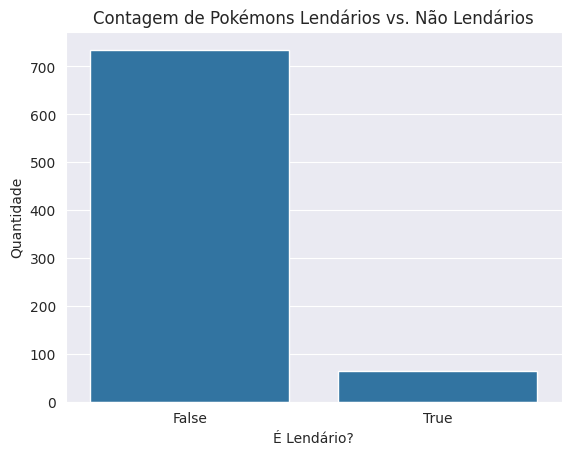

In [18]:
sns.countplot(x='Legendary', data=df)
plt.title('Contagem de Pokémons Lendários vs. Não Lendários')

plt.ylabel('Quantidade')
plt.xlabel('É Lendário?')

plt.show()

Dentro dos 721 Pokémons presentes no dataset - contabilizando com as variações, temos um total de 800 Pokémons -, temos uma minoria de 65 espécimes consideradas lendárias.

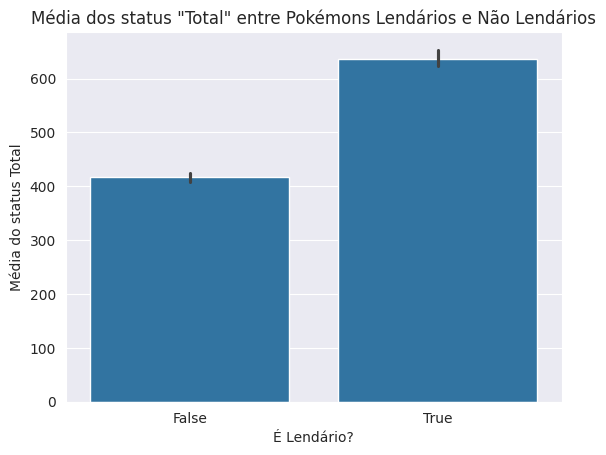

In [21]:
sns.barplot(x='Legendary', y='Total', data=df)

plt.title('Média dos status "Total" entre Pokémons Lendários e Não Lendários')

plt.ylabel('Média do status Total')
plt.xlabel('É Lendário?')

plt.show()

Aqui, podemos verificar que ainda que tenhamos uma minoria de Pokémons Lendários, apenas 65, a média do atributo "Total", o qual indica o quão forte é um pokémon, é predominantemente maior nos pokemóns lendários.